In [1]:
import os
curr_dir = os.getcwd()
dataset_dir = os.path.join(curr_dir,'Dataset')
print(os.listdir(dataset_dir))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df_train = pd.read_csv(os.path.join(dataset_dir,'kannada_offensive_train_corrected.csv'))
df_dev = pd.read_csv(os.path.join(dataset_dir,'kannada_offensive_dev_corrected.csv'))

In [4]:
df_train.sample(10)

,text,label
5786,Bro valledu yarigu bega kaansodilla,Not_offensive
5166,En guru song akkan idu song Andre akkan navgot...,Not_offensive
4655,I love it,Not_offensive
602,Hands Up.... Addictive... Matte matte hadanna ...,Not_offensive
6140,ಶಂಭು ಬಳಿಗಾರವರೆ ತುಂಬಾ ಧನ್ಯವಾದಗಳು ಹಾಸ್ಯ ಜಾನಪದ ಕಥೆ,Not_offensive
5453,ತೊಗರಿ ತಿಪ್ಪ ಸೂಪರ್ ಸ್ಟಾರ್,Not_offensive
5732,@Praveen P ik,not-Kannada
5964,ನನ್ನ ಈ ಕಾಮೆಂಟ್ ಕನ್ನಡ ಚಲನಚಿತ್ರ ನಟ ನಟಿಯರು,Offensive_Targeted_Insult_Other
2159,Super agi ugididera,Not_offensive
4255,Next part madi,Not_offensive


In [5]:
df_train.shape

(6217, 2)

Text(0, 0.5, 'Counts')

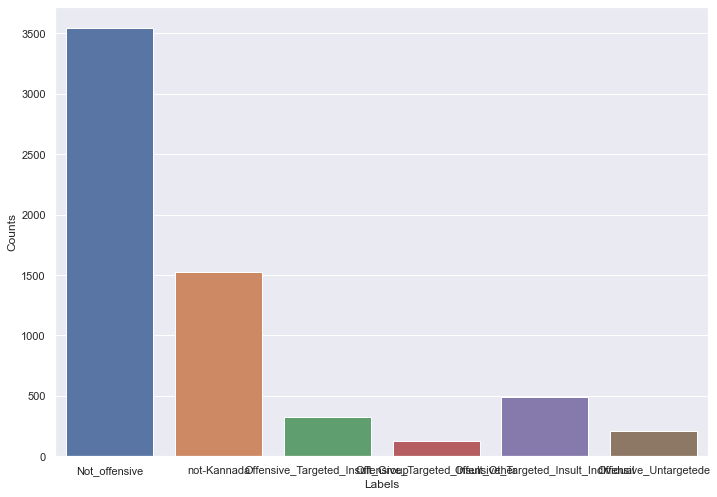

In [6]:
sns.countplot(x = df_train['label'])
plt.xlabel('Labels')
plt.ylabel('Counts')

In [7]:
df_train['label'].value_counts()

Not_offensive                           3544
not-Kannada                             1522
Offensive_Targeted_Insult_Individual     487
Offensive_Targeted_Insult_Group          329
Offensive_Untargetede                    212
Offensive_Targeted_Insult_Other          123
Name: label, dtype: int64

In [8]:
df_train

,text,label
0,Tik tok alli jagala madtidralla adra baggenu o...,Not_offensive
1,Anyone from kerala here,not-Kannada
2,Movie rerelease madi plss,Not_offensive
3,Amazon prime alli bittidira....yella manele no...,Not_offensive
4,Guru sure news nanu tik tok dawn lod madeda ya...,Not_offensive
...,...,...
6212,Dubb Full movie in telugu,Not_offensive
6213,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...,Not_offensive
6214,Sir Nimm Mathininda Navu Kalibeku Agirodu Ennu...,Not_offensive
6215,ನನಗು same ಹಂಗೇ ಅನ್ನಿಸ್ತು,Not_offensive


In [9]:
text_lengths = df_train['text'].map(len)
text_lengths

0        86
1        23
2        25
3        55
4       118
       ... 
6212     25
6213     95
6214    126
6215     24
6216     17
Name: text, Length: 6217, dtype: int64

C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

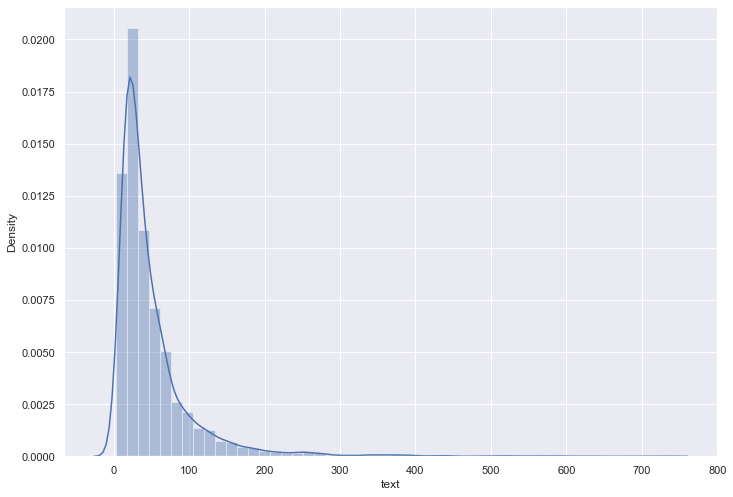

In [10]:
sns.distplot(text_lengths)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [12]:
print("We have {} unique classes".format(len(df_train['label'].unique())))
print("We have {} training samples".format(len(df_train.text)))
print("We have {} test samples".format(len(df_dev.text)))

We have 6 unique classes
We have 6217 training samples
We have 777 test samples


In [13]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(df_train.text, df_train.label)
# Predict the categories of the dev data
predicted_categories = model.predict(df_dev.text)

In [14]:
predicted_categories

array(['Not_offensive', 'Not_offensive', 'Not_offensive', 'Not_offensive',
       'Not_offensive', 'Not_offensive', 'Not_offensive', 'Not_offensive',
       'Not_offensive', 'Not_offensive', 'Not_offensive', 'Not_offensive',
       'Not_offensive', 'Not_offensive', 'Not_offensive', 'Not_offensive',
       'Not_offensive', 'Not_offensive', 'Not_offensive', 'not-Kannada',
       'Not_offensive', 'not-Kannada', 'Not_offensive', 'Not_offensive',
       'Not_offensive', 'not-Kannada', 'Not_offensive', 'Not_offensive',
       'Not_offensive', 'not-Kannada', 'Not_offensive', 'Not_offensive',
       'Not_offensive', 'Offensive_Targeted_Insult_Individual',
       'not-Kannada', 'Not_offensive', 'Not_offensive',
       'Offensive_Targeted_Insult_Individual', 'Not_offensive',
       'Not_offensive', 'Not_offensive',
       'Offensive_Targeted_Insult_Individual', 'Not_offensive',
       'not-Kannada', 'Not_offensive', 'not-Kannada', 'Not_offensive',
       'Not_offensive', 'Not_offensive', 'Not_of

In [15]:
print(classification_report(df_dev.label,predicted_categories , target_names=df_train['label'].unique()))

                                      precision    recall  f1-score   support

                       Not_offensive       0.61      0.96      0.75       426
                         not-Kannada       0.00      0.00      0.00        45
     Offensive_Targeted_Insult_Group       1.00      0.21      0.35        66
     Offensive_Targeted_Insult_Other       0.00      0.00      0.00        16
Offensive_Targeted_Insult_Individual       0.00      0.00      0.00        33
               Offensive_Untargetede       0.79      0.40      0.53       191

                            accuracy                           0.64       777
                           macro avg       0.40      0.26      0.27       777
                        weighted avg       0.61      0.64      0.57       777



C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(os.listdir(dataset_dir))

['kannada_offensive_dev.csv', 'kannada_offensive_dev2.csv', 'kannada_offensive_dev_corrected.csv', 'kannada_offensive_train.csv', 'kannada_offensive_train2.csv', 'kannada_offensive_train_corrected.csv', 'mal_full_offensive_dev.csv', 'mal_full_offensive_dev_corrected.csv', 'mal_full_offensive_train.csv', 'mal_full_offensive_train_corrected.csv', 'tamil_offensive_full_dev.csv', 'tamil_offensive_full_dev_corrected.csv', 'tamil_offensive_full_train.csv', 'tamil_offensive_full_train_corrected.csv']


In [17]:
df_train = pd.read_csv(os.path.join(dataset_dir,'mal_full_offensive_train_corrected.csv'))
df_dev = pd.read_csv(os.path.join(dataset_dir,'mal_full_offensive_dev_corrected.csv'))

In [18]:
df_train.sample(10)

,text,label
6438,Ee christmasile oru mass entertainer aavum ee ...,Not_offensive
1793,#MAMMOOKKA as Money Lender ഇതു പൊളിക്കും 🤙__,Not_offensive
5141,കൗതുകവും ജിഞ്ജാസ നിറഞ്ഞതുമായ ചുരുളഴിയാത്ത രഹസ്...,Not_offensive
3456,ഇനി വെറും മണിക്കൂറുകൾ മാത്രം കട്ട വെയ്റ്റിംഗ്,Not_offensive
12216,ഒടുവിൽ സിദ്ധിക്ക് അണ്ണൻ തന്നു അല്ലെ റൈറ്സ്,Not_offensive
15810,Thalaivaaaaa views nokan ratri 2manik alaramv...,Not_offensive
8367,Jayettante punyalanu sesham trissur slangilull...,Not_offensive
7657,ചിന്ത പാളുന്ന കൊല്ലകൊല്ലി ഐറ്റം മാമാങ്കത്തിൽ...,Not_offensive
13309,Kandirikum..december season jayettan lelathil ...,Not_offensive
7142,Pakka mass film...lalettan,Not_offensive


In [19]:
df_train.shape

(16010, 2)

Text(0, 0.5, 'Counts')

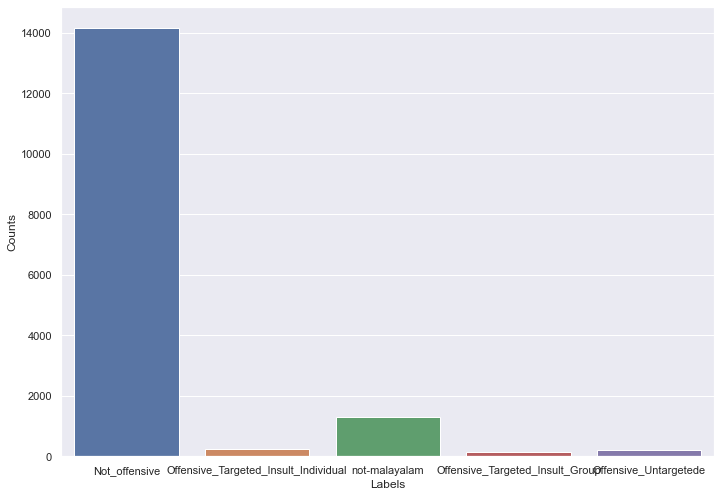

In [20]:
sns.countplot(x = df_train['label'])
plt.xlabel('Labels')
plt.ylabel('Counts')

In [21]:
df_train['label'].value_counts()

Not_offensive                           14153
not-malayalam                            1287
Offensive_Targeted_Insult_Individual      239
Offensive_Untargetede                     191
Offensive_Targeted_Insult_Group           140
Name: label, dtype: int64

In [22]:
text_lengths = df_train['text'].map(len)
text_lengths

0         57
1        138
2         41
3         25
4         60
        ... 
16005    106
16006     50
16007     35
16008     55
16009     60
Name: text, Length: 16010, dtype: int64

C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

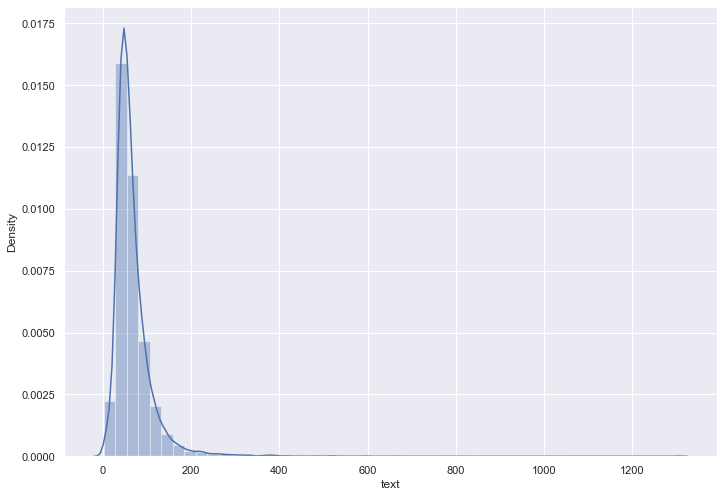

In [23]:
sns.distplot(text_lengths)

In [24]:
print("We have {} unique classes".format(len(df_train['label'].unique())))
print("We have {} training samples".format(len(df_train.text)))
print("We have {} test samples".format(len(df_dev.text)))

We have 5 unique classes
We have 16010 training samples
We have 1999 test samples


In [25]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(df_train.text, df_train.label)
# Predict the categories of the dev data
predicted_categories = model.predict(df_dev.text)

In [26]:
predicted_categories

array(['Not_offensive', 'Not_offensive', 'Not_offensive', ...,
       'Not_offensive', 'Not_offensive', 'Not_offensive'], dtype='<U36')

In [27]:
print(classification_report(df_dev.label,predicted_categories , target_names=df_train['label'].unique()))

                                      precision    recall  f1-score   support

                       Not_offensive       0.90      1.00      0.95      1779
Offensive_Targeted_Insult_Individual       0.00      0.00      0.00        13
                       not-malayalam       0.00      0.00      0.00        24
     Offensive_Targeted_Insult_Group       0.00      0.00      0.00        20
               Offensive_Untargetede       0.94      0.10      0.18       163

                            accuracy                           0.90      1999
                           macro avg       0.37      0.22      0.22      1999
                        weighted avg       0.88      0.90      0.86      1999



C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print(os.listdir(dataset_dir))

['kannada_offensive_dev.csv', 'kannada_offensive_dev2.csv', 'kannada_offensive_dev_corrected.csv', 'kannada_offensive_train.csv', 'kannada_offensive_train2.csv', 'kannada_offensive_train_corrected.csv', 'mal_full_offensive_dev.csv', 'mal_full_offensive_dev_corrected.csv', 'mal_full_offensive_train.csv', 'mal_full_offensive_train_corrected.csv', 'tamil_offensive_full_dev.csv', 'tamil_offensive_full_dev_corrected.csv', 'tamil_offensive_full_train.csv', 'tamil_offensive_full_train_corrected.csv']


In [29]:
df_train = pd.read_csv(os.path.join(dataset_dir,'tamil_offensive_full_train_corrected.csv'))
df_dev = pd.read_csv(os.path.join(dataset_dir,'tamil_offensive_full_dev_corrected.csv'))

In [30]:
df_train.sample(10)

,text,label
20180,RAJINI SIR ......🧡 WAITING FROM KERALA.......,Not_offensive
20853,Thala fan's la oru like podunga,Not_offensive
33689,nejathulae surya oda appa oviyar than da,Not_offensive
6881,Hit Like For Thala Nerkonda Paarvai,Not_offensive
3887,12:30 Ku YouTube stuck achii..ennum clear Agala,Offensive_Targeted_Insult_Other
3881,Heroine DD sayal la irukanga.. Gang oda Theatr...,Not_offensive
6958,I like the last dialogue Unakku yaara athu p...,Not_offensive
25068,0:18 sail pallavi solradhu ennamo unmai thaan,Not_offensive
10526,Surya anna idhukudha ungala nadippin nayagannu...,Not_offensive
26648,Trailera fulla paakave porumai illaye. Padam e...,Offensive_Targeted_Insult_Individual


In [31]:
df_train.shape

(35139, 2)

Text(0, 0.5, 'Counts')

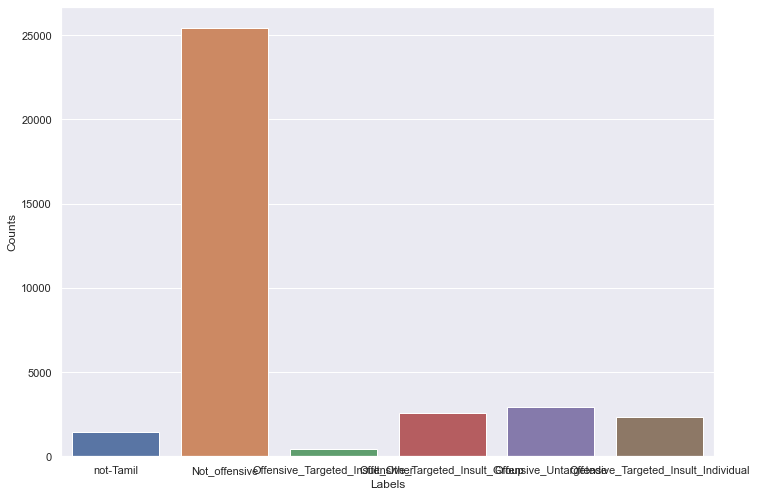

In [32]:
sns.countplot(x = df_train['label'])
plt.xlabel('Labels')
plt.ylabel('Counts')

In [33]:
df_train['label'].value_counts()

Not_offensive                           25425
Offensive_Untargetede                    2906
Offensive_Targeted_Insult_Group          2557
Offensive_Targeted_Insult_Individual     2343
not-Tamil                                1454
Offensive_Targeted_Insult_Other           454
Name: label, dtype: int64

In [34]:
text_lengths = df_train['text'].map(len)
text_lengths

0        54
1        41
2        85
3        49
4        50
         ..
35134    54
35135    28
35136    25
35137    86
35138    33
Name: text, Length: 35139, dtype: int64

C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

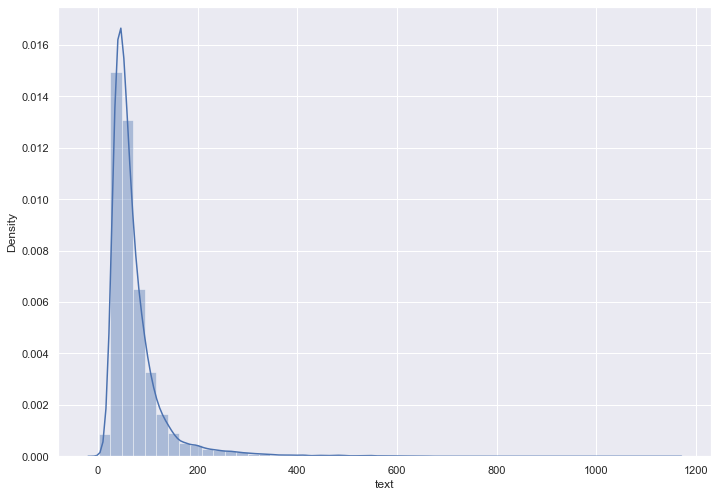

In [35]:
sns.distplot(text_lengths)

In [36]:
print("We have {} unique classes".format(len(df_train['label'].unique())))
print("We have {} training samples".format(len(df_train.text)))
print("We have {} test samples".format(len(df_dev.text)))

We have 6 unique classes
We have 35139 training samples
We have 4388 test samples


In [37]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(df_train.text, df_train.label)
# Predict the categories of the dev data
predicted_categories = model.predict(df_dev.text)

In [38]:
predicted_categories

array(['Not_offensive', 'Not_offensive', 'Not_offensive', ...,
       'Not_offensive', 'Not_offensive', 'Not_offensive'], dtype='<U36')

In [39]:
print(classification_report(df_dev.label,predicted_categories , target_names=df_train['label'].unique()))

                                      precision    recall  f1-score   support

                           not-Tamil       0.74      1.00      0.85      3193
                       Not_offensive       0.00      0.00      0.00       295
     Offensive_Targeted_Insult_Other       1.00      0.00      0.01       307
     Offensive_Targeted_Insult_Group       0.00      0.00      0.00        65
               Offensive_Untargetede       0.86      0.02      0.03       356
Offensive_Targeted_Insult_Individual       0.96      0.39      0.55       172

                            accuracy                           0.74      4388
                           macro avg       0.59      0.23      0.24      4388
                        weighted avg       0.72      0.74      0.64      4388



C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
